      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8
7  120.2   19.6       11.6   13.2
8    8.6    2.1        1.0    4.8
9  199.8    2.6       21.2   10.6


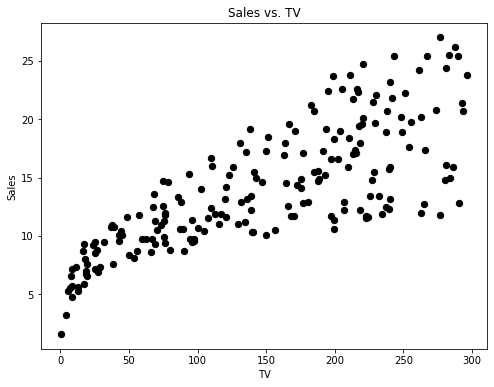

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           1.47e-42
Time:                        12:36:17   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

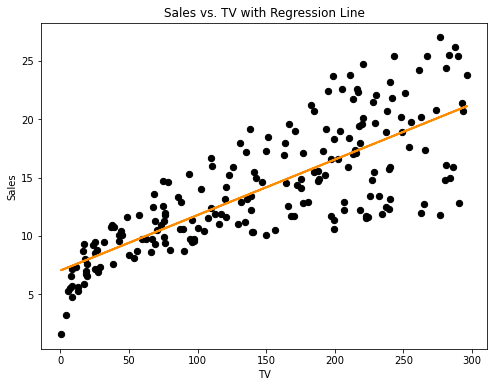

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           1.58e-96
Time:                        12:36:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [2]:
########################################## Advertising Data


import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
adv = pd.read_csv('Datasets/Advertising.csv')
print(adv.head(10))

# Scatter plot to check the linearity
plt.figure(figsize=(8, 6))
plt.scatter(adv['TV'], adv['Sales'], c='black', s=40)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs. TV')
plt.show()

# Linear regression model 1: Sales ~ TV
X1 = adv[['TV']]
y = adv['Sales']
X1 = sm.add_constant(X1)  # Adds a constant term to the predictor
model1 = sm.OLS(y, X1).fit()
print(model1.summary())

# Plotting the regression line
plt.figure(figsize=(8, 6))
plt.scatter(adv['TV'], adv['Sales'], c='black', s=40)
plt.plot(adv['TV'], model1.predict(X1), color='darkorange', linewidth=2)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs. TV with Regression Line')
plt.show()

# Linear regression model 2: Sales ~ all predictors
X2 = adv.drop(columns='Sales')
X2 = sm.add_constant(X2)  # Adds a constant term to the predictor
model2 = sm.OLS(y, X2).fit()
print(model2.summary())


# ANOVA
mod1 = smf.ols('Sales ~ TV', data=adv).fit()
mod2 = smf.ols('Sales ~ TV + Radio + Newspaper', data=adv).fit()
anova_results = sm.stats.anova_lm(mod1, mod2)
print(anova_results)

# Confidence interval
conf_interval = mod1.conf_int(alpha=0.05)
print(conf_interval)

# Prediction interval
new_obs = pd.DataFrame({'TV': [145.3], 'Radio': [51.1], 'Newspaper': [33.9]})
pred_interval = mod1.get_prediction(new_obs[['TV']]).summary_frame(alpha=0.05)
print(pred_interval)

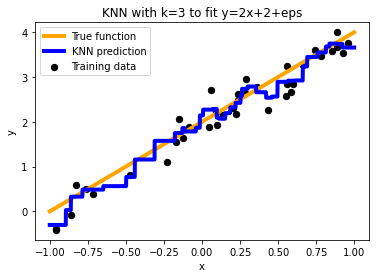

In [3]:
######## KNN regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Generate training data
np.random.seed(0)
train_x = pd.DataFrame({'x': np.random.uniform(-1, 1, 40)})
train_y = 2 * train_x['x'] + 2 + np.random.normal(0, 0.3, 40)

# KNN regression model
knnmod1 = KNeighborsRegressor(n_neighbors=3)
knnmod1.fit(train_x, train_y)

# Generate test data
test_x = pd.DataFrame({'x': np.arange(-1, 1, 0.001)})
test_y = knnmod1.predict(test_x)

# Plot
plt.scatter(train_x['x'], train_y, c='black', s=40, label='Training data')
plt.plot(test_x['x'], 2 * test_x['x'] + 2, color='orange', linewidth=4, label='True function')
plt.plot(test_x['x'], test_y, color='blue', linewidth=4, label='KNN prediction')
plt.title('KNN with k=3 to fit y=2x+2+eps')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

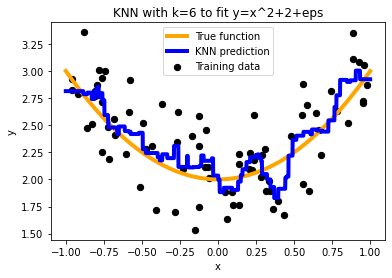

In [5]:
######### KNN regression


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Generate training data
np.random.seed(0)
train_x = pd.DataFrame({'x': np.random.uniform(-1, 1, 80)})
train_y = (train_x['x'])**2 + 2 + np.random.normal(0, 0.3, 80)

# KNN regression model
knnmod2 = KNeighborsRegressor(n_neighbors=6)
knnmod2.fit(train_x, train_y)

# Generate test data
test_x = pd.DataFrame({'x': np.arange(-1, 1, 0.001)})
test_y = knnmod2.predict(test_x)

# Plot
plt.scatter(train_x['x'], train_y, c='black', s=40, label='Training data')
plt.plot(test_x['x'], (test_x['x'])**2 + 2, color='orange', linewidth=4, label='True function')
plt.plot(test_x['x'], test_y, color='blue', linewidth=4, label='KNN prediction')
plt.title('KNN with k=6 to fit y=x^2+2+eps')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


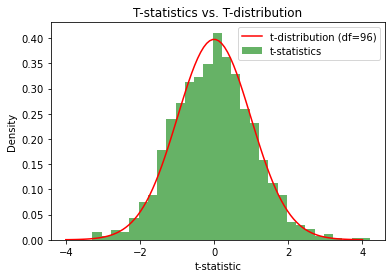

In [9]:
############################### simulation showing that (hatbeta-beta)/sd(beta) indeed follows t distribution.

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Parameters
n_simulations = 500
n_samples = 100
true_beta = np.array([1.5, -2.0, 3.0])
t_statistics = []

# Simulation loop
np.random.seed(0)
for _ in range(n_simulations):
    X = np.random.normal(size=(n_samples, 3))
    y = X @ true_beta + np.random.normal(scale=1.0, size=n_samples)
    
    # Fit the model
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    # Calculate t-statistics
    estimated_beta = model.params[1:]  # Exclude intercept
    se_beta = model.bse[1:]  # Standard errors
    t_stat = (estimated_beta - true_beta) / se_beta
    t_statistics.extend(t_stat)

# Compare with t-distribution
df = model.df_resid
x = np.linspace(-4, 4, 100)
t_dist = stats.t(df)

plt.hist(t_statistics, bins=30, density=True, alpha=0.6, color='g', label='t-statistics')
plt.plot(x, t_dist.pdf(x), 'r-', label=f't-distribution (df={int(df)})')
plt.xlabel('t-statistic')
plt.ylabel('Density')
plt.title('T-statistics vs. T-distribution')
plt.legend()
plt.show()

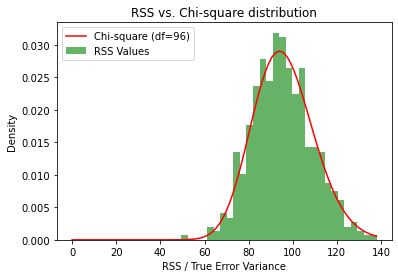

In [12]:
######## simulation showing that RSS/sigma^2 indeed follows chi-squared distribution

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Parameters
n_simulations = 500
n_samples = 100
true_beta = np.array([1.5, -2.0, 3.0])
true_error_variance = 1.0
rss_values = []

# Simulation loop
np.random.seed(0)
for _ in range(n_simulations):
    X = np.random.normal(size=(n_samples, 3))
    y = X @ true_beta + np.random.normal(scale=np.sqrt(true_error_variance), size=n_samples)
    
    # Fit the model
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    # Calculate residual sum of squares
    rss = model.ssr  # Sum of squared residuals
    rss_values.append(rss / true_error_variance)

# Compare with chi-square distribution
df_resid = model.df_resid
x = np.linspace(0, max(rss_values), 100)
chi2_dist = stats.chi2(df_resid)

plt.hist(rss_values, bins=30, density=True, alpha=0.6, color='g', label='RSS Values')
plt.plot(x, chi2_dist.pdf(x), 'r-', label=f'Chi-square (df={int(df_resid)})')
plt.xlabel('RSS / True Error Variance')
plt.ylabel('Density')
plt.title('RSS vs. Chi-square distribution')
plt.legend()
plt.show()

In [14]:
################### Multiple linear regression, only X1 and X2 are useful, report the AIC, BIC, Mallow's Cp and Adjusted Rsquare

import numpy as np
import pandas as pd
import statsmodels.api as sm
from itertools import combinations

# Generate synthetic data
np.random.seed(0)
n_samples = 100
X = np.random.normal(size=(n_samples, 4))
true_beta = np.array([2.0, -1.5, 0, 0])  # Only first 2 predictors are useful
y = X @ true_beta + np.random.normal(scale=1.0, size=n_samples)

# DataFrame for predictors
df = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(X.shape[1])])

# Function to calculate Mallow's Cp
def mallows_cp(model, sigma_squared):
    p = model.df_model + 1
    rss = model.ssr
    return (rss / sigma_squared) - (len(y) - 2 * p)

# Fit models of different sizes
results = []

for k in range(1, 5):
    for combo in combinations(df.columns, k):
        X_subset = sm.add_constant(df[list(combo)])
        model = sm.OLS(y, X_subset).fit()
        
        # Calculate statistics
        aic = model.aic
        bic = model.bic
        adj_r_squared = model.rsquared_adj
        sigma_squared = model.mse_resid
        cp = mallows_cp(model, sigma_squared)
        
        results.append({
            'Predictors': combo,
            'AIC': aic,
            'BIC': bic,
            "Mallow's Cp": cp,
            'Adjusted R^2': adj_r_squared
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values('AIC').reset_index(drop=True))

          Predictors         AIC         BIC  Mallow's Cp  Adjusted R^2
0           (X1, X2)  293.641130  301.456640          3.0      0.868893
1       (X1, X2, X3)  295.553610  305.974291          4.0      0.867643
2       (X1, X2, X4)  295.615241  306.035922          4.0      0.867561
3   (X1, X2, X3, X4)  297.527426  310.553277          5.0      0.866285
4           (X1, X3)  412.313657  420.129168          3.0      0.570449
5       (X1, X3, X4)  413.958476  424.379157          4.0      0.567513
6              (X1,)  414.311089  419.521429          2.0      0.557492
7           (X1, X4)  415.944919  423.760429          3.0      0.554564
8              (X2,)  450.163646  455.373987          2.0      0.366675
9           (X2, X3)  450.501357  458.316868          3.0      0.370694
10          (X2, X4)  451.795263  459.610773          3.0      0.362499
11      (X2, X3, X4)  452.141374  462.562055          4.0      0.366424
12             (X3,)  496.794066  502.004407          2.0     -0